# Import the libraries

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

In [20]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize']=(12,8)

# Load the data

In [11]:
 data = pd.read_csv('./Official data.csv')

In [22]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id_student                  32593 non-null  int64 
 1   code_module                 32593 non-null  object
 2   code_presentation           32593 non-null  object
 3   age_band                    32593 non-null  int64 
 4   disability                  32593 non-null  int64 
 5   highest_education           32593 non-null  int64 
 6   module_presentation_length  32593 non-null  int64 
 7   final_result                32593 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 2.0+ MB


# Plot the independent vs. dependent variable

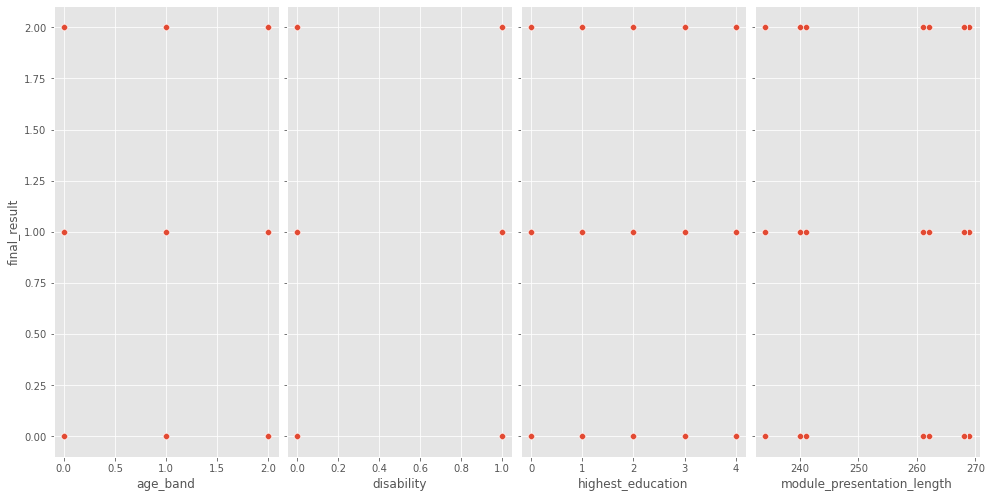

In [31]:
sns.pairplot(data, x_vars=['age_band', 'disability', 'highest_education', 'module_presentation_length'], y_vars='final_result', height=7, aspect=0.5);

# Plot the heatmap

<AxesSubplot:>

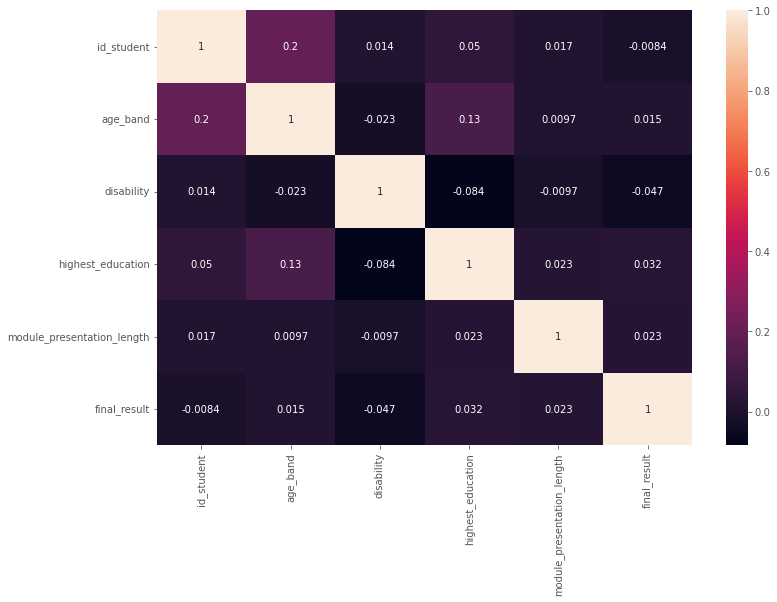

In [32]:
sns.heatmap(data.corr(),annot=True)

# Linear regression (without data split) 

In [39]:
from sklearn.linear_model import LinearRegression

x = data[['age_band', 'disability', 'highest_education', 'module_presentation_length']]
y = data.final_result

linmod = LinearRegression()
linmod.fit(x,y)

print(linmod.intercept_)
print(linmod.coef_)

list(zip(['age_band', 'disability', 'highest_education', 'module_presentation_length'], linmod.coef_))

0.5671446247819676
[ 0.01893728 -0.13365359  0.02314387  0.00145142]


[('age_band', 0.018937284838038578),
 ('disability', -0.1336535898737257),
 ('highest_education', 0.02314387153801826),
 ('module_presentation_length', 0.0014514221037380819)]

From this, the regression equation can be deduced as follows:
final_result = 0.5671446247819676 +  0.018937284838038578 * age_band - 0.1336535898737257 * disability + 0.02314387153801826 * highest_education + 0.0014514221037380819 * module_presentation_length
Does that mean:
- Variables as age_band, highest_education, modeule_presentation_length have a positive impact on the final outcome of the student. However, only the variable disability had a negative effect causing the results to decrease.

Calculate the model#1 accuracy

In [40]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

linmod_pred = linmod.predict(x[['age_band', 'disability', 'highest_education', 'module_presentation_length']])

print("RMSE:", np.sqrt(mean_squared_error(y,linmod1_pred)))
print("R^2:", r2_score(y, linmod1_pred))

RMSE: 0.8832790884832837
R^2: 0.0036029913992335905


In this multivariable linear regression model, the independent variables do not explain well for the dependent variable (final_result) and have high RMSE, therefore, the estimate level shows that the model's reliability is not the highest.
Therefore, this model is only considered as a reference to build campaigns to increase the number of high-scoring students.